In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../../"))

# our library
from src.mcmc_sat import mcmc, utils

In [2]:
A = np.array([[1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
             [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
             [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
             [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
             [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
             [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
             [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
             [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
             [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0],
             [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1],
             [1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

y=np.array([3,12,1,21,86,16,2,24,5,184,822,163,40,102,13,58,253,38,18,104,40,19,147,25,52,220,35,1,3,6,8,36,5,1,14,2,1,10,13,3,43,4])

In [24]:
print([sum(x) for x in A[:8]])
y[:9]

[6, 6, 6, 6, 6, 6, 6, 6]


array([ 3, 12,  1, 21, 86, 16,  2, 24,  5])

In [25]:
bound = 9
num_bits = 6
num_vars = A.shape[1]
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=A[:bound], y=y[:bound],
                                                  num_bits=num_bits,
                                                  max_int_bv=int(86/6),
                                                  backend='cmsgen',
                                                  num_samples=10000)

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 00791438b32bb387e1f6ba7c1b211d7f6595aa06
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -fno-stack-protector -mtune=native -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DNDEBUG -D_FORTIFY_SOURCE=0 -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = ON | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING = ON | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = OFF | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 9.4.0
c executed with command line: cmsgen --samples 10000 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samples to file: cmsgen_input/cmsgen_samples.out


c Number of samples found until now:     10


c Number of samples found until now:     20


c Number of samples found until now:     30


c Number of samples found until now:     40


c Number of samples found until now:     50


c Number of samples found until now:     60


c Number of samples found until now:     70


c Number of samples found until now:     80


c Number of samples found until now:     90


c Number of samples found until now:    100


c Number of samples found until now:    110


c Number of samples found until now:    120


c Number of samples found until now:    130


c Number of samples found until now:    140


c Number of samples found until now:    150


c Number of samples found until now:    160


c Number of samples found until now:    170


c Number of samples found until now:    180


c Number of samples found until now:    190


c Number of samples found until now:    200


c Number of samples found until now:    210


c Number of samples found until now:    220


c Number of samples found until now:    230


c Number of samples found until now:    240


c Number of samples found until now:    250


c Number of samples found until now:    260


c Number of samples found until now:    270


c Number of samples found until now:    280


c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310


c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350


c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390


c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430


c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470


c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500


c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530


c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until now:    560
c Number of samples found until now:    570


c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610


c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650


c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690


c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730


c Number of samples found until now:    740
c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770


c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820


c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until now:    860


c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890


c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920


c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960


c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990


c Number of samples found until now:   1000
c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030


c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070


c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100


c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130


c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170


c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200


c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230


c Number of samples found until now:   1240
c Number of samples found until now:   1250
c Number of samples found until now:   1260
c Number of samples found until now:   1270


c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310


c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350


c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until now:   1380
c Number of samples found until now:   1390


c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430


c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460


c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until now:   1490


c Number of samples found until now:   1500
c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530


c Number of samples found until now:   1540
c Number of samples found until now:   1550
c Number of samples found until now:   1560


c Number of samples found until now:   1570
c Number of samples found until now:   1580
c Number of samples found until now:   1590


c Number of samples found until now:   1600
c Number of samples found until now:   1610


c Number of samples found until now:   1620
c Number of samples found until now:   1630


c Number of samples found until now:   1640
c Number of samples found until now:   1650


c Number of samples found until now:   1660
c Number of samples found until now:   1670


c Number of samples found until now:   1680
c Number of samples found until now:   1690
c Number of samples found until now:   1700


c Number of samples found until now:   1710
c Number of samples found until now:   1720
c Number of samples found until now:   1730
c Number of samples found until now:   1740


c Number of samples found until now:   1750
c Number of samples found until now:   1760
c Number of samples found until now:   1770
c Number of samples found until now:   1780
c Number of samples found until now:   1790


c Number of samples found until now:   1800
c Number of samples found until now:   1810
c Number of samples found until now:   1820


c Number of samples found until now:   1830
c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until now:   1860


c Number of samples found until now:   1870
c Number of samples found until now:   1880
c Number of samples found until now:   1890
c Number of samples found until now:   1900


c Number of samples found until now:   1910
c Number of samples found until now:   1920
c Number of samples found until now:   1930
c Number of samples found until now:   1940


c Number of samples found until now:   1950
c Number of samples found until now:   1960
c Number of samples found until now:   1970


c Number of samples found until now:   1980
c Number of samples found until now:   1990
c Number of samples found until now:   2000


c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030


c Number of samples found until now:   2040
c Number of samples found until now:   2050
c Number of samples found until now:   2060
c Number of samples found until now:   2070


c Number of samples found until now:   2080
c Number of samples found until now:   2090
c Number of samples found until now:   2100
c Number of samples found until now:   2110


c Number of samples found until now:   2120
c Number of samples found until now:   2130
c Number of samples found until now:   2140


c Number of samples found until now:   2150
c Number of samples found until now:   2160


c Number of samples found until now:   2170
c Number of samples found until now:   2180
c Number of samples found until now:   2190


c Number of samples found until now:   2200
c Number of samples found until now:   2210


c Number of samples found until now:   2220
c Number of samples found until now:   2230
c Number of samples found until now:   2240


c Number of samples found until now:   2250
c Number of samples found until now:   2260
c Number of samples found until now:   2270


c Number of samples found until now:   2280
c Number of samples found until now:   2290
c Number of samples found until now:   2300
c Number of samples found until now:   2310


c Number of samples found until now:   2320
c Number of samples found until now:   2330
c Number of samples found until now:   2340


c Number of samples found until now:   2350
c Number of samples found until now:   2360
c Number of samples found until now:   2370


c Number of samples found until now:   2380
c Number of samples found until now:   2390
c Number of samples found until now:   2400


c Number of samples found until now:   2410
c Number of samples found until now:   2420
c Number of samples found until now:   2430


c Number of samples found until now:   2440
c Number of samples found until now:   2450
c Number of samples found until now:   2460
c Number of samples found until now:   2470


c Number of samples found until now:   2480
c Number of samples found until now:   2490
c Number of samples found until now:   2500


c Number of samples found until now:   2510
c Number of samples found until now:   2520


c Number of samples found until now:   2530
c Number of samples found until now:   2540
c Number of samples found until now:   2550


c Number of samples found until now:   2560
c Number of samples found until now:   2570
c Number of samples found until now:   2580


c Number of samples found until now:   2590
c Number of samples found until now:   2600
c Number of samples found until now:   2610


c Number of samples found until now:   2620
c Number of samples found until now:   2630
c Number of samples found until now:   2640
c Number of samples found until now:   2650


c Number of samples found until now:   2660
c Number of samples found until now:   2670
c Number of samples found until now:   2680


c Number of samples found until now:   2690
c Number of samples found until now:   2700
c Number of samples found until now:   2710


c Number of samples found until now:   2720
c Number of samples found until now:   2730
c Number of samples found until now:   2740


c Number of samples found until now:   2750
c Number of samples found until now:   2760
c Number of samples found until now:   2770


c Number of samples found until now:   2780
c Number of samples found until now:   2790
c Number of samples found until now:   2800


c Number of samples found until now:   2810
c Number of samples found until now:   2820
c Number of samples found until now:   2830


c Number of samples found until now:   2840
c Number of samples found until now:   2850


c Number of samples found until now:   2860
c Number of samples found until now:   2870
c Number of samples found until now:   2880


c Number of samples found until now:   2890
c Number of samples found until now:   2900
c Number of samples found until now:   2910


c Number of samples found until now:   2920
c Number of samples found until now:   2930


c Number of samples found until now:   2940
c Number of samples found until now:   2950
c Number of samples found until now:   2960


c Number of samples found until now:   2970
c Number of samples found until now:   2980
c Number of samples found until now:   2990


c Number of samples found until now:   3000
c Number of samples found until now:   3010
c Number of samples found until now:   3020


c Number of samples found until now:   3030
c Number of samples found until now:   3040


c Number of samples found until now:   3050
c Number of samples found until now:   3060


c Number of samples found until now:   3070
c Number of samples found until now:   3080


c Number of samples found until now:   3090
c Number of samples found until now:   3100
c Number of samples found until now:   3110


c Number of samples found until now:   3120
c Number of samples found until now:   3130
c Number of samples found until now:   3140


c Number of samples found until now:   3150
c Number of samples found until now:   3160
c Number of samples found until now:   3170


c Number of samples found until now:   3180
c Number of samples found until now:   3190
c Number of samples found until now:   3200


c Number of samples found until now:   3210
c Number of samples found until now:   3220
c Number of samples found until now:   3230
c Number of samples found until now:   3240


c Number of samples found until now:   3250
c Number of samples found until now:   3260
c Number of samples found until now:   3270
c Number of samples found until now:   3280


c Number of samples found until now:   3290
c Number of samples found until now:   3300
c Number of samples found until now:   3310


c Number of samples found until now:   3320
c Number of samples found until now:   3330


c Number of samples found until now:   3340
c Number of samples found until now:   3350
c Number of samples found until now:   3360


c Number of samples found until now:   3370
c Number of samples found until now:   3380
c Number of samples found until now:   3390


c Number of samples found until now:   3400
c Number of samples found until now:   3410
c Number of samples found until now:   3420


c Number of samples found until now:   3430
c Number of samples found until now:   3440
c Number of samples found until now:   3450


c Number of samples found until now:   3460
c Number of samples found until now:   3470
c Number of samples found until now:   3480


c Number of samples found until now:   3490
c Number of samples found until now:   3500
c Number of samples found until now:   3510


c Number of samples found until now:   3520
c Number of samples found until now:   3530


c Number of samples found until now:   3540
c Number of samples found until now:   3550
c Number of samples found until now:   3560


c Number of samples found until now:   3570
c Number of samples found until now:   3580
c Number of samples found until now:   3590


c Number of samples found until now:   3600
c Number of samples found until now:   3610
c Number of samples found until now:   3620


c Number of samples found until now:   3630
c Number of samples found until now:   3640


c Number of samples found until now:   3650
c Number of samples found until now:   3660


c Number of samples found until now:   3670
c Number of samples found until now:   3680
c Number of samples found until now:   3690
c Number of samples found until now:   3700


c Number of samples found until now:   3710
c Number of samples found until now:   3720
c Number of samples found until now:   3730


c Number of samples found until now:   3740
c Number of samples found until now:   3750
c Number of samples found until now:   3760


c Number of samples found until now:   3770
c Number of samples found until now:   3780
c Number of samples found until now:   3790


c Number of samples found until now:   3800
c Number of samples found until now:   3810
c Number of samples found until now:   3820


c Number of samples found until now:   3830
c Number of samples found until now:   3840
c Number of samples found until now:   3850


c Number of samples found until now:   3860
c Number of samples found until now:   3870


c Number of samples found until now:   3880
c Number of samples found until now:   3890
c Number of samples found until now:   3900


c Number of samples found until now:   3910
c Number of samples found until now:   3920
c Number of samples found until now:   3930
c Number of samples found until now:   3940


c Number of samples found until now:   3950
c Number of samples found until now:   3960
c Number of samples found until now:   3970
c Number of samples found until now:   3980


c Number of samples found until now:   3990
c Number of samples found until now:   4000
c Number of samples found until now:   4010


c Number of samples found until now:   4020
c Number of samples found until now:   4030
c Number of samples found until now:   4040
c Number of samples found until now:   4050


c Number of samples found until now:   4060
c Number of samples found until now:   4070
c Number of samples found until now:   4080


c Number of samples found until now:   4090
c Number of samples found until now:   4100
c Number of samples found until now:   4110


c Number of samples found until now:   4120
c Number of samples found until now:   4130
c Number of samples found until now:   4140


c Number of samples found until now:   4150
c Number of samples found until now:   4160
c Number of samples found until now:   4170


c Number of samples found until now:   4180
c Number of samples found until now:   4190
c Number of samples found until now:   4200
c Number of samples found until now:   4210


c Number of samples found until now:   4220
c Number of samples found until now:   4230
c Number of samples found until now:   4240


c Number of samples found until now:   4250
c Number of samples found until now:   4260


c Number of samples found until now:   4270
c Number of samples found until now:   4280
c Number of samples found until now:   4290


c Number of samples found until now:   4300
c Number of samples found until now:   4310
c Number of samples found until now:   4320


c Number of samples found until now:   4330
c Number of samples found until now:   4340
c Number of samples found until now:   4350


c Number of samples found until now:   4360
c Number of samples found until now:   4370
c Number of samples found until now:   4380


c Number of samples found until now:   4390
c Number of samples found until now:   4400
c Number of samples found until now:   4410
c Number of samples found until now:   4420


c Number of samples found until now:   4430
c Number of samples found until now:   4440
c Number of samples found until now:   4450


c Number of samples found until now:   4460
c Number of samples found until now:   4470
c Number of samples found until now:   4480
c Number of samples found until now:   4490


c Number of samples found until now:   4500
c Number of samples found until now:   4510
c Number of samples found until now:   4520


c Number of samples found until now:   4530
c Number of samples found until now:   4540
c Number of samples found until now:   4550
c Number of samples found until now:   4560


c Number of samples found until now:   4570
c Number of samples found until now:   4580
c Number of samples found until now:   4590


c Number of samples found until now:   4600
c Number of samples found until now:   4610
c Number of samples found until now:   4620
c Number of samples found until now:   4630


c Number of samples found until now:   4640
c Number of samples found until now:   4650
c Number of samples found until now:   4660


c Number of samples found until now:   4670
c Number of samples found until now:   4680
c Number of samples found until now:   4690


c Number of samples found until now:   4700
c Number of samples found until now:   4710
c Number of samples found until now:   4720
c Number of samples found until now:   4730


c Number of samples found until now:   4740
c Number of samples found until now:   4750
c Number of samples found until now:   4760


c Number of samples found until now:   4770
c Number of samples found until now:   4780


c Number of samples found until now:   4790
c Number of samples found until now:   4800
c Number of samples found until now:   4810


c Number of samples found until now:   4820
c Number of samples found until now:   4830
c Number of samples found until now:   4840


c Number of samples found until now:   4850
c Number of samples found until now:   4860
c Number of samples found until now:   4870
c Number of samples found until now:   4880


c Number of samples found until now:   4890
c Number of samples found until now:   4900
c Number of samples found until now:   4910
c Number of samples found until now:   4920


c Number of samples found until now:   4930
c Number of samples found until now:   4940


c Number of samples found until now:   4950
c Number of samples found until now:   4960
c Number of samples found until now:   4970


c Number of samples found until now:   4980
c Number of samples found until now:   4990
c Number of samples found until now:   5000


c Number of samples found until now:   5010
c Number of samples found until now:   5020
c Number of samples found until now:   5030
c Number of samples found until now:   5040


c Number of samples found until now:   5050
c Number of samples found until now:   5060
c Number of samples found until now:   5070


c Number of samples found until now:   5080
c Number of samples found until now:   5090
c Number of samples found until now:   5100


c Number of samples found until now:   5110
c Number of samples found until now:   5120
c Number of samples found until now:   5130
c Number of samples found until now:   5140


c Number of samples found until now:   5150
c Number of samples found until now:   5160
c Number of samples found until now:   5170


c Number of samples found until now:   5180
c Number of samples found until now:   5190


c Number of samples found until now:   5200
c Number of samples found until now:   5210
c Number of samples found until now:   5220
c Number of samples found until now:   5230


c Number of samples found until now:   5240
c Number of samples found until now:   5250
c Number of samples found until now:   5260


c Number of samples found until now:   5270
c Number of samples found until now:   5280
c Number of samples found until now:   5290
c Number of samples found until now:   5300


c Number of samples found until now:   5310
c Number of samples found until now:   5320


c Number of samples found until now:   5330
c Number of samples found until now:   5340
c Number of samples found until now:   5350


c Number of samples found until now:   5360
c Number of samples found until now:   5370
c Number of samples found until now:   5380


c Number of samples found until now:   5390
c Number of samples found until now:   5400
c Number of samples found until now:   5410
c Number of samples found until now:   5420


c Number of samples found until now:   5430
c Number of samples found until now:   5440
c Number of samples found until now:   5450


c Number of samples found until now:   5460
c Number of samples found until now:   5470
c Number of samples found until now:   5480
c Number of samples found until now:   5490


c Number of samples found until now:   5500
c Number of samples found until now:   5510
c Number of samples found until now:   5520


c Number of samples found until now:   5530
c Number of samples found until now:   5540
c Number of samples found until now:   5550


c Number of samples found until now:   5560
c Number of samples found until now:   5570
c Number of samples found until now:   5580


c Number of samples found until now:   5590


c Number of samples found until now:   5600
c Number of samples found until now:   5610


c Number of samples found until now:   5620
c Number of samples found until now:   5630
c Number of samples found until now:   5640


c Number of samples found until now:   5650
c Number of samples found until now:   5660
c Number of samples found until now:   5670


c Number of samples found until now:   5680
c Number of samples found until now:   5690
c Number of samples found until now:   5700


c Number of samples found until now:   5710
c Number of samples found until now:   5720
c Number of samples found until now:   5730


c Number of samples found until now:   5740
c Number of samples found until now:   5750
c Number of samples found until now:   5760


c Number of samples found until now:   5770
c Number of samples found until now:   5780
c Number of samples found until now:   5790
c Number of samples found until now:   5800


c Number of samples found until now:   5810
c Number of samples found until now:   5820
c Number of samples found until now:   5830
c Number of samples found until now:   5840


c Number of samples found until now:   5850
c Number of samples found until now:   5860
c Number of samples found until now:   5870
c Number of samples found until now:   5880


c Number of samples found until now:   5890
c Number of samples found until now:   5900
c Number of samples found until now:   5910


c Number of samples found until now:   5920
c Number of samples found until now:   5930
c Number of samples found until now:   5940


c Number of samples found until now:   5950
c Number of samples found until now:   5960
c Number of samples found until now:   5970


c Number of samples found until now:   5980
c Number of samples found until now:   5990
c Number of samples found until now:   6000


c Number of samples found until now:   6010
c Number of samples found until now:   6020
c Number of samples found until now:   6030


c Number of samples found until now:   6040
c Number of samples found until now:   6050
c Number of samples found until now:   6060


c Number of samples found until now:   6070
c Number of samples found until now:   6080
c Number of samples found until now:   6090


c Number of samples found until now:   6100
c Number of samples found until now:   6110
c Number of samples found until now:   6120


c Number of samples found until now:   6130
c Number of samples found until now:   6140
c Number of samples found until now:   6150


c Number of samples found until now:   6160
c Number of samples found until now:   6170
c Number of samples found until now:   6180


c Number of samples found until now:   6190
c Number of samples found until now:   6200
c Number of samples found until now:   6210


c Number of samples found until now:   6220
c Number of samples found until now:   6230
c Number of samples found until now:   6240


c Number of samples found until now:   6250
c Number of samples found until now:   6260
c Number of samples found until now:   6270
c Number of samples found until now:   6280


c Number of samples found until now:   6290
c Number of samples found until now:   6300
c Number of samples found until now:   6310


c Number of samples found until now:   6320
c Number of samples found until now:   6330
c Number of samples found until now:   6340
c Number of samples found until now:   6350


c Number of samples found until now:   6360
c Number of samples found until now:   6370
c Number of samples found until now:   6380


c Number of samples found until now:   6390
c Number of samples found until now:   6400


c Number of samples found until now:   6410
c Number of samples found until now:   6420
c Number of samples found until now:   6430


c Number of samples found until now:   6440
c Number of samples found until now:   6450
c Number of samples found until now:   6460


c Number of samples found until now:   6470
c Number of samples found until now:   6480
c Number of samples found until now:   6490


c Number of samples found until now:   6500
c Number of samples found until now:   6510


c Number of samples found until now:   6520
c Number of samples found until now:   6530
c Number of samples found until now:   6540


c Number of samples found until now:   6550
c Number of samples found until now:   6560
c Number of samples found until now:   6570
c Number of samples found until now:   6580


c Number of samples found until now:   6590
c Number of samples found until now:   6600
c Number of samples found until now:   6610
c Number of samples found until now:   6620


c Number of samples found until now:   6630
c Number of samples found until now:   6640


c Number of samples found until now:   6650
c Number of samples found until now:   6660


c Number of samples found until now:   6670
c Number of samples found until now:   6680
c Number of samples found until now:   6690
c Number of samples found until now:   6700


c Number of samples found until now:   6710
c Number of samples found until now:   6720
c Number of samples found until now:   6730


c Number of samples found until now:   6740
c Number of samples found until now:   6750
c Number of samples found until now:   6760


c Number of samples found until now:   6770
c Number of samples found until now:   6780


c Number of samples found until now:   6790
c Number of samples found until now:   6800
c Number of samples found until now:   6810


c Number of samples found until now:   6820
c Number of samples found until now:   6830
c Number of samples found until now:   6840


c Number of samples found until now:   6850
c Number of samples found until now:   6860
c Number of samples found until now:   6870


c Number of samples found until now:   6880
c Number of samples found until now:   6890


c Number of samples found until now:   6900
c Number of samples found until now:   6910
c Number of samples found until now:   6920
c Number of samples found until now:   6930


c Number of samples found until now:   6940
c Number of samples found until now:   6950


c Number of samples found until now:   6960
c Number of samples found until now:   6970
c Number of samples found until now:   6980


c Number of samples found until now:   6990
c Number of samples found until now:   7000
c Number of samples found until now:   7010


c Number of samples found until now:   7020
c Number of samples found until now:   7030
c Number of samples found until now:   7040


c Number of samples found until now:   7050
c Number of samples found until now:   7060
c Number of samples found until now:   7070


c Number of samples found until now:   7080
c Number of samples found until now:   7090
c Number of samples found until now:   7100


c Number of samples found until now:   7110
c Number of samples found until now:   7120


c Number of samples found until now:   7130
c Number of samples found until now:   7140
c Number of samples found until now:   7150


c Number of samples found until now:   7160
c Number of samples found until now:   7170


c Number of samples found until now:   7180
c Number of samples found until now:   7190


c Number of samples found until now:   7200
c Number of samples found until now:   7210
c Number of samples found until now:   7220


c Number of samples found until now:   7230
c Number of samples found until now:   7240


c Number of samples found until now:   7250
c Number of samples found until now:   7260
c Number of samples found until now:   7270


c Number of samples found until now:   7280
c Number of samples found until now:   7290


c Number of samples found until now:   7300
c Number of samples found until now:   7310
c Number of samples found until now:   7320


c Number of samples found until now:   7330
c Number of samples found until now:   7340
c Number of samples found until now:   7350
c Number of samples found until now:   7360


c Number of samples found until now:   7370
c Number of samples found until now:   7380
c Number of samples found until now:   7390


c Number of samples found until now:   7400
c Number of samples found until now:   7410


c Number of samples found until now:   7420
c Number of samples found until now:   7430
c Number of samples found until now:   7440


c Number of samples found until now:   7450
c Number of samples found until now:   7460
c Number of samples found until now:   7470


c Number of samples found until now:   7480
c Number of samples found until now:   7490
c Number of samples found until now:   7500


c Number of samples found until now:   7510
c Number of samples found until now:   7520
c Number of samples found until now:   7530
c Number of samples found until now:   7540


c Number of samples found until now:   7550
c Number of samples found until now:   7560
c Number of samples found until now:   7570


c Number of samples found until now:   7580
c Number of samples found until now:   7590
c Number of samples found until now:   7600


c Number of samples found until now:   7610
c Number of samples found until now:   7620
c Number of samples found until now:   7630
c Number of samples found until now:   7640


c Number of samples found until now:   7650


c Number of samples found until now:   7660
c Number of samples found until now:   7670


c Number of samples found until now:   7680
c Number of samples found until now:   7690


c Number of samples found until now:   7700
c Number of samples found until now:   7710


c Number of samples found until now:   7720
c Number of samples found until now:   7730


c Number of samples found until now:   7740
c Number of samples found until now:   7750
c Number of samples found until now:   7760


c Number of samples found until now:   7770
c Number of samples found until now:   7780
c Number of samples found until now:   7790


c Number of samples found until now:   7800
c Number of samples found until now:   7810
c Number of samples found until now:   7820


c Number of samples found until now:   7830
c Number of samples found until now:   7840


c Number of samples found until now:   7850
c Number of samples found until now:   7860


c Number of samples found until now:   7870
c Number of samples found until now:   7880
c Number of samples found until now:   7890
c Number of samples found until now:   7900


c Number of samples found until now:   7910
c Number of samples found until now:   7920


c Number of samples found until now:   7930
c Number of samples found until now:   7940
c Number of samples found until now:   7950


c Number of samples found until now:   7960
c Number of samples found until now:   7970
c Number of samples found until now:   7980


c Number of samples found until now:   7990
c Number of samples found until now:   8000
c Number of samples found until now:   8010


c Number of samples found until now:   8020
c Number of samples found until now:   8030
c Number of samples found until now:   8040


c Number of samples found until now:   8050
c Number of samples found until now:   8060
c Number of samples found until now:   8070


c Number of samples found until now:   8080
c Number of samples found until now:   8090
c Number of samples found until now:   8100


c Number of samples found until now:   8110
c Number of samples found until now:   8120
c Number of samples found until now:   8130


c Number of samples found until now:   8140
c Number of samples found until now:   8150
c Number of samples found until now:   8160


c Number of samples found until now:   8170
c Number of samples found until now:   8180
c Number of samples found until now:   8190


c Number of samples found until now:   8200
c Number of samples found until now:   8210
c Number of samples found until now:   8220


c Number of samples found until now:   8230
c Number of samples found until now:   8240
c Number of samples found until now:   8250


c Number of samples found until now:   8260
c Number of samples found until now:   8270
c Number of samples found until now:   8280
c Number of samples found until now:   8290
c Number of samples found until now:   8300


c Number of samples found until now:   8310
c Number of samples found until now:   8320
c Number of samples found until now:   8330
c Number of samples found until now:   8340


c Number of samples found until now:   8350
c Number of samples found until now:   8360
c Number of samples found until now:   8370
c Number of samples found until now:   8380
c Number of samples found until now:   8390


c Number of samples found until now:   8400
c Number of samples found until now:   8410
c Number of samples found until now:   8420
c Number of samples found until now:   8430


c Number of samples found until now:   8440
c Number of samples found until now:   8450
c Number of samples found until now:   8460
c Number of samples found until now:   8470


c Number of samples found until now:   8480
c Number of samples found until now:   8490
c Number of samples found until now:   8500


c Number of samples found until now:   8510
c Number of samples found until now:   8520
c Number of samples found until now:   8530
c Number of samples found until now:   8540


c Number of samples found until now:   8550
c Number of samples found until now:   8560
c Number of samples found until now:   8570


c Number of samples found until now:   8580
c Number of samples found until now:   8590
c Number of samples found until now:   8600
c Number of samples found until now:   8610


c Number of samples found until now:   8620
c Number of samples found until now:   8630


c Number of samples found until now:   8640
c Number of samples found until now:   8650
c Number of samples found until now:   8660


c Number of samples found until now:   8670
c Number of samples found until now:   8680
c Number of samples found until now:   8690


c Number of samples found until now:   8700
c Number of samples found until now:   8710
c Number of samples found until now:   8720


c Number of samples found until now:   8730
c Number of samples found until now:   8740
c Number of samples found until now:   8750


c Number of samples found until now:   8760
c Number of samples found until now:   8770
c Number of samples found until now:   8780
c Number of samples found until now:   8790


c Number of samples found until now:   8800
c Number of samples found until now:   8810


c Number of samples found until now:   8820
c Number of samples found until now:   8830
c Number of samples found until now:   8840


c Number of samples found until now:   8850
c Number of samples found until now:   8860
c Number of samples found until now:   8870


c Number of samples found until now:   8880
c Number of samples found until now:   8890
c Number of samples found until now:   8900


c Number of samples found until now:   8910
c Number of samples found until now:   8920


c Number of samples found until now:   8930
c Number of samples found until now:   8940
c Number of samples found until now:   8950
c Number of samples found until now:   8960


c Number of samples found until now:   8970
c Number of samples found until now:   8980
c Number of samples found until now:   8990
c Number of samples found until now:   9000


c Number of samples found until now:   9010
c Number of samples found until now:   9020
c Number of samples found until now:   9030
c Number of samples found until now:   9040


c Number of samples found until now:   9050
c Number of samples found until now:   9060
c Number of samples found until now:   9070


c Number of samples found until now:   9080
c Number of samples found until now:   9090
c Number of samples found until now:   9100
c Number of samples found until now:   9110


c Number of samples found until now:   9120
c Number of samples found until now:   9130
c Number of samples found until now:   9140
c Number of samples found until now:   9150


c Number of samples found until now:   9160
c Number of samples found until now:   9170
c Number of samples found until now:   9180


c Number of samples found until now:   9190
c Number of samples found until now:   9200
c Number of samples found until now:   9210


c Number of samples found until now:   9220
c Number of samples found until now:   9230
c Number of samples found until now:   9240


c Number of samples found until now:   9250
c Number of samples found until now:   9260


c Number of samples found until now:   9270
c Number of samples found until now:   9280
c Number of samples found until now:   9290
c Number of samples found until now:   9300


c Number of samples found until now:   9310
c Number of samples found until now:   9320
c Number of samples found until now:   9330
c Number of samples found until now:   9340


c Number of samples found until now:   9350
c Number of samples found until now:   9360
c Number of samples found until now:   9370
c Number of samples found until now:   9380


c Number of samples found until now:   9390
c Number of samples found until now:   9400
c Number of samples found until now:   9410


c Number of samples found until now:   9420
c Number of samples found until now:   9430


c Number of samples found until now:   9440
c Number of samples found until now:   9450
c Number of samples found until now:   9460


c Number of samples found until now:   9470
c Number of samples found until now:   9480


c Number of samples found until now:   9490
c Number of samples found until now:   9500
c Number of samples found until now:   9510


c Number of samples found until now:   9520
c Number of samples found until now:   9530
c Number of samples found until now:   9540
c Number of samples found until now:   9550


c Number of samples found until now:   9560
c Number of samples found until now:   9570
c Number of samples found until now:   9580


c Number of samples found until now:   9590
c Number of samples found until now:   9600
c Number of samples found until now:   9610


c Number of samples found until now:   9620
c Number of samples found until now:   9630
c Number of samples found until now:   9640


c Number of samples found until now:   9650
c Number of samples found until now:   9660
c Number of samples found until now:   9670


c Number of samples found until now:   9680
c Number of samples found until now:   9690
c Number of samples found until now:   9700
c Number of samples found until now:   9710


c Number of samples found until now:   9720
c Number of samples found until now:   9730
c Number of samples found until now:   9740
c Number of samples found until now:   9750


c Number of samples found until now:   9760
c Number of samples found until now:   9770
c Number of samples found until now:   9780


c Number of samples found until now:   9790
c Number of samples found until now:   9800
c Number of samples found until now:   9810


c Number of samples found until now:   9820
c Number of samples found until now:   9830
c Number of samples found until now:   9840
c Number of samples found until now:   9850


c Number of samples found until now:   9860
c Number of samples found until now:   9870
c Number of samples found until now:   9880
c Number of samples found until now:   9890


c Number of samples found until now:   9900
c Number of samples found until now:   9910
c Number of samples found until now:   9920
c Number of samples found until now:   9930


c Number of samples found until now:   9940
c Number of samples found until now:   9950
c Number of samples found until now:   9960
c Number of samples found until now:   9970


c Number of samples found until now:   9980
c Number of samples found until now:   9990
c Finished generating all 10000 samples
c Total time: 2e+02 s 


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (72), generating only 20 plots
  warnings.warn(


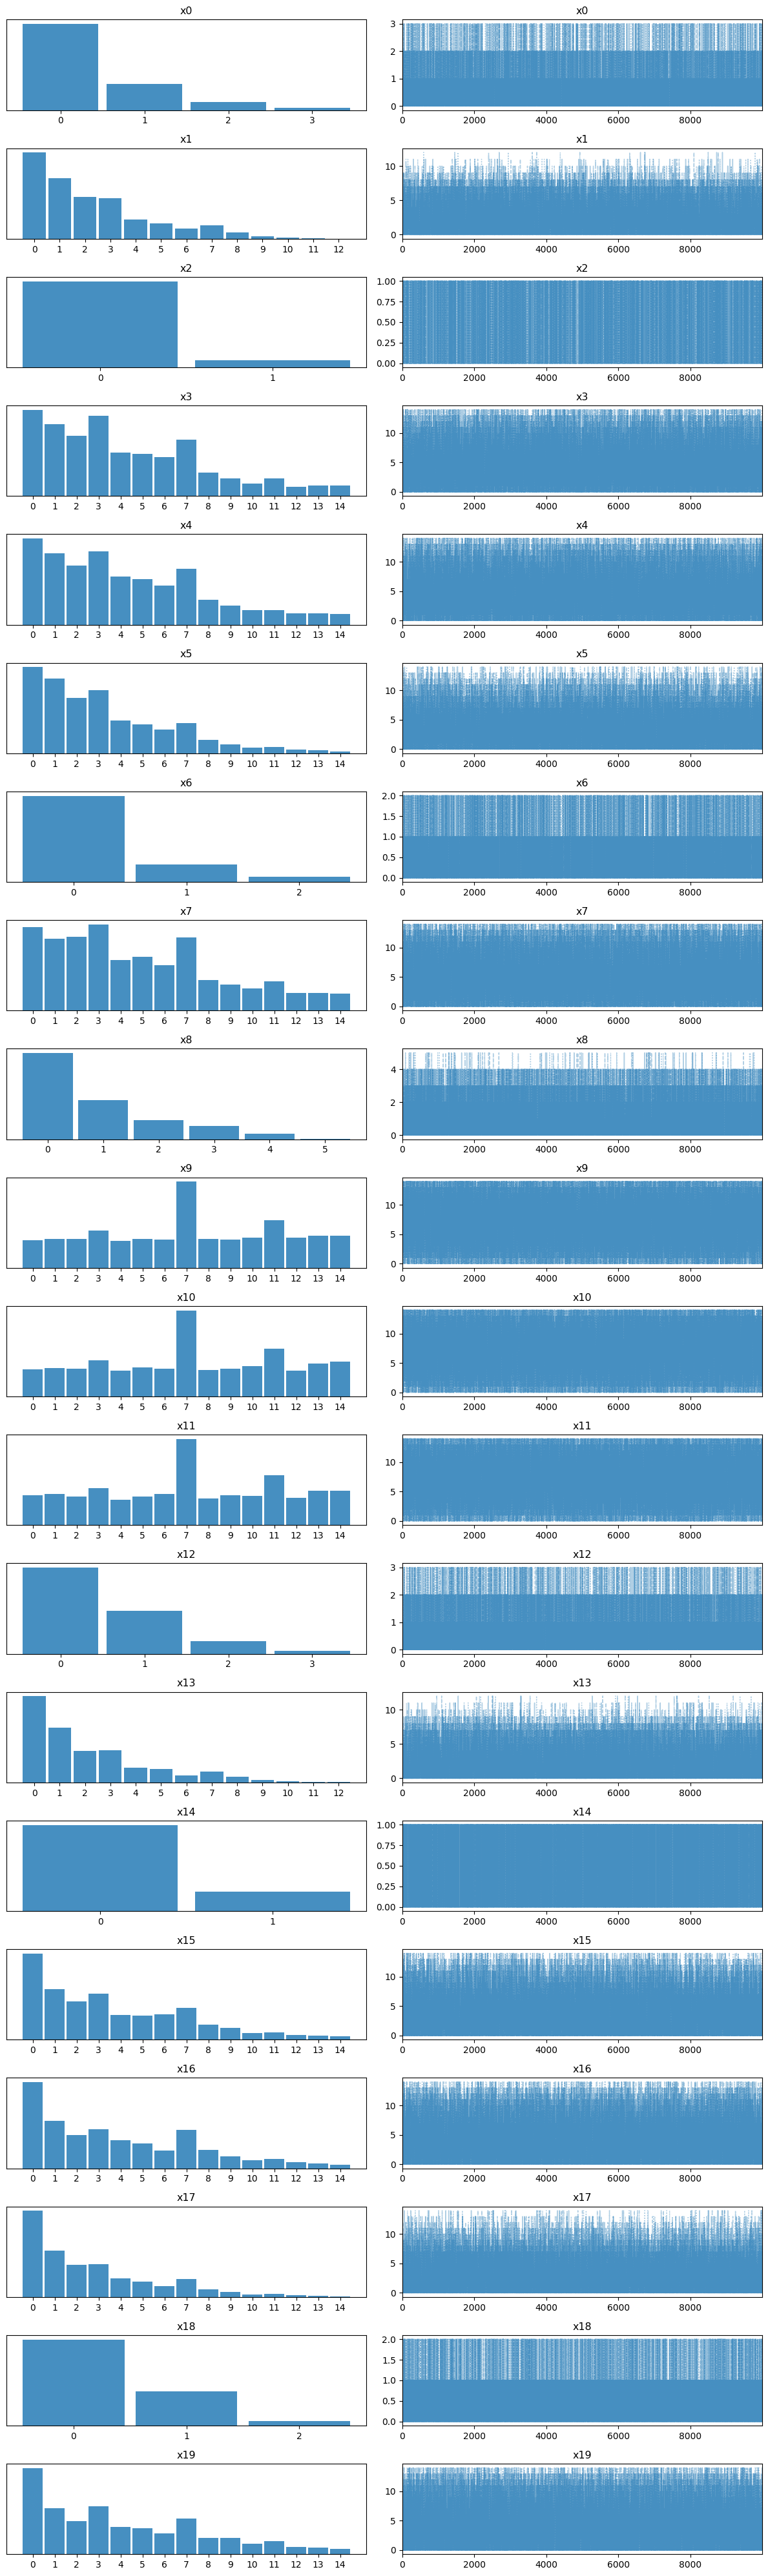

In [26]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('cmsgen_trace_plot.png', dpi=150);

In [28]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,0.401,0.695,0.0,2.0,0.003,0.002,40507.0,39510.0,1.0
x1,2.252,2.348,0.0,7.0,0.012,0.008,40296.0,39918.0,1.0
x2,0.076,0.266,0.0,1.0,0.001,0.001,40419.0,40000.0,1.0
x3,4.324,3.627,0.0,11.0,0.018,0.013,39863.0,39426.0,1.0
x4,4.394,3.650,0.0,11.0,0.019,0.013,38516.0,39827.0,1.0
...,...,...,...,...,...,...,...,...,...
x67,4.321,3.926,0.0,12.0,0.020,0.014,38609.0,39202.0,1.0
x68,0.909,1.127,0.0,3.0,0.006,0.004,39023.0,38769.0,1.0
x69,7.192,4.124,1.0,14.0,0.021,0.015,39925.0,39870.0,1.0
x70,7.192,4.124,1.0,14.0,0.021,0.015,38980.0,39557.0,1.0


In [29]:
utils.save_trace(trace, f'books_SAT_cmsgen_{num_vars}_{num_bits}.nc')